In [117]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
training = pd.read_csv('TRAINwoWET.csv')

print(training.describe())

              LAPS  WETPRAC  WETQUALI  PRAC3SECONDS    Q3SECONDS
count  1410.000000   1410.0    1410.0   1410.000000  1410.000000
mean     18.184397      0.0       0.0     85.928763    84.832427
std       3.881500      0.0       0.0     11.865861    11.649796
min       9.000000      0.0       0.0     54.064000    53.377000
25%      16.000000      0.0       0.0     76.782500    75.548500
50%      18.000000      0.0       0.0     86.436000    85.435000
75%      20.000000      0.0       0.0     94.962500    93.596750
max      32.000000      0.0       0.0    110.447000   121.954000


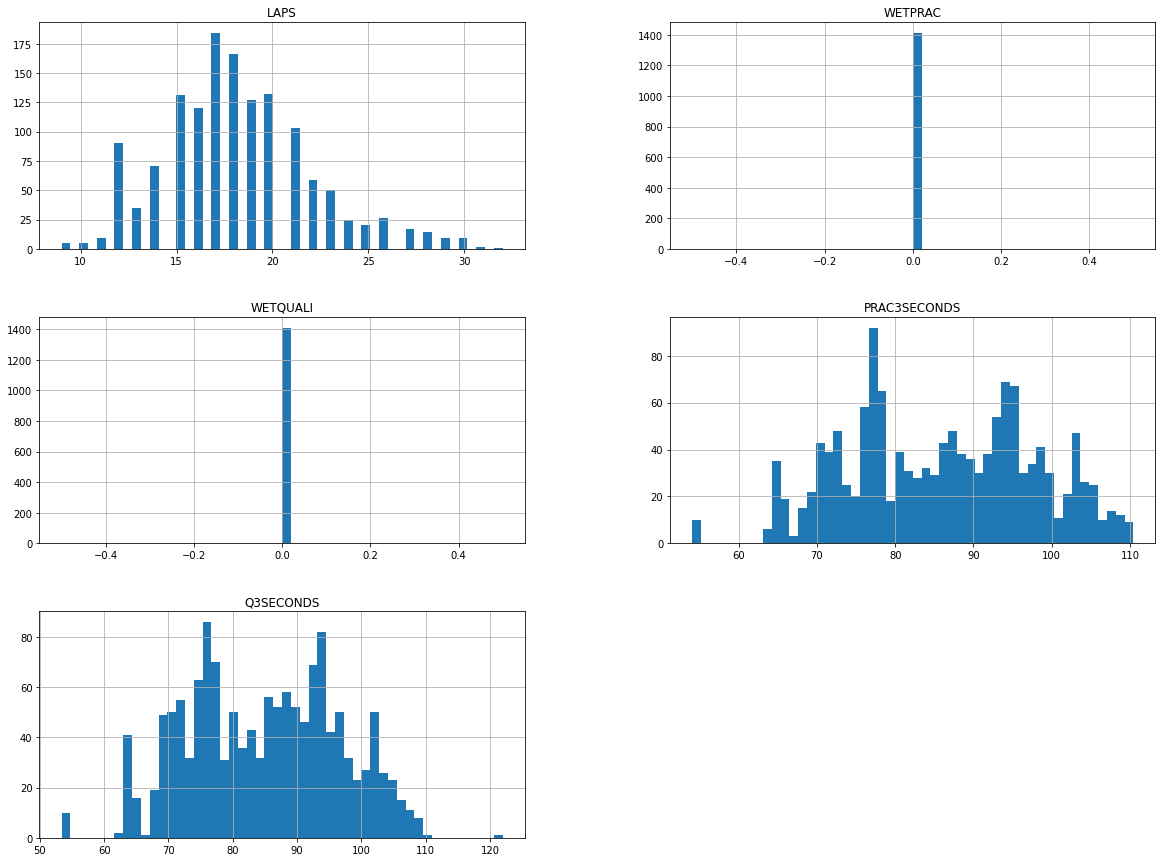

In [118]:
training.hist(bins=50, figsize=(20,15))
plt.show()

In [119]:
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [120]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(training, test_size=0.2, random_state=42)

test_set

,LAPS,WETPRAC,WETQUALI,PRAC3SECONDS,Q3SECONDS
353,23,0.0,0.0,74.807,74.552
864,17,0.0,0.0,83.334,81.442
1311,17,0.0,0.0,70.179,68.923
192,19,0.0,0.0,76.772,75.014
782,20,0.0,0.0,80.682,79.294
...,...,...,...,...,...
1001,19,0.0,0.0,98.399,96.408
610,14,0.0,0.0,77.017,76.276
188,30,0.0,0.0,77.788,76.946
289,20,0.0,0.0,82.010,80.788


<AxesSubplot:xlabel='Q3SECONDS', ylabel='PRAC3SECONDS'>

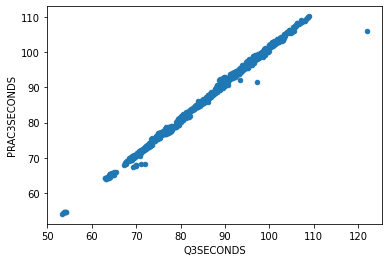

In [121]:
relation = train_set.copy()
relation.plot(kind="scatter", x="Q3SECONDS", y="PRAC3SECONDS")


In [122]:
corr_matrix = train_set.corr()
corr_matrix["Q3SECONDS"].sort_values(ascending=False)

Q3SECONDS       1.000000
PRAC3SECONDS    0.997656
LAPS           -0.319022
WETPRAC              NaN
WETQUALI             NaN
Name: Q3SECONDS, dtype: float64

array([[<AxesSubplot:xlabel='LAPS', ylabel='LAPS'>,
        <AxesSubplot:xlabel='Q3SECONDS', ylabel='LAPS'>,
        <AxesSubplot:xlabel='PRAC3SECONDS', ylabel='LAPS'>],
       [<AxesSubplot:xlabel='LAPS', ylabel='Q3SECONDS'>,
        <AxesSubplot:xlabel='Q3SECONDS', ylabel='Q3SECONDS'>,
        <AxesSubplot:xlabel='PRAC3SECONDS', ylabel='Q3SECONDS'>],
       [<AxesSubplot:xlabel='LAPS', ylabel='PRAC3SECONDS'>,
        <AxesSubplot:xlabel='Q3SECONDS', ylabel='PRAC3SECONDS'>,
        <AxesSubplot:xlabel='PRAC3SECONDS', ylabel='PRAC3SECONDS'>]],
      dtype=object)

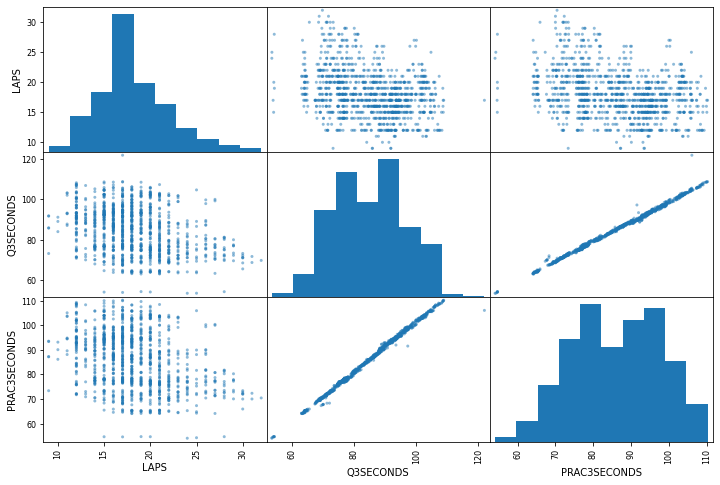

In [123]:
from pandas.plotting import scatter_matrix

attributes = ["LAPS","Q3SECONDS","PRAC3SECONDS"]
scatter_matrix(train_set[attributes], figsize=(12, 8))


In [124]:


trainin = train_set.drop("Q3SECONDS", axis=1)
trainin_labels = train_set["Q3SECONDS"].copy()
trainin_labels



1034     75.336
579      73.271
1138     80.090
48       69.092
155      97.232
         ...   
1095     85.839
1130     78.887
1294     86.844
860      80.486
1126    102.438
Name: Q3SECONDS, Length: 1128, dtype: float64

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

trainin_num_tr = num_pipeline.fit_transform(trainin)
trainin_num_tr

from sklearn.compose import ColumnTransformer

num_attribs = list(trainin)

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs)])

trainin_prepared = full_pipeline.fit_transform(trainin)

trainin_prepared

array([[-0.02988924,  0.        ,  0.        , -0.80844429],
       [ 1.50261384,  0.        ,  0.        , -1.06303606],
       [ 0.22552794,  0.        ,  0.        , -0.45145026],
       ...,
       [-0.28530642,  0.        ,  0.        ,  0.15636509],
       [-0.02988924,  0.        ,  0.        , -0.32394014],
       [-0.79614078,  0.        ,  0.        ,  1.53395419]])

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(trainin_prepared, trainin_labels)




LinearRegression()

In [127]:
some_data = trainin.iloc[:5]
some_labels = trainin_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

# print("Predictions:", lin_reg.predict(some_data_prepared))

trainin_predictions = lin_reg.predict(trainin_prepared)
# print("Labels:", list(some_labels))
lin_mae = mean_squared_error(trainin_labels, trainin_predictions)
lin_train_rmse = np.sqrt(lin_mae)
print(lin_train_rmse)

0.7737310943199179


In [128]:

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(trainin_prepared, trainin_labels)



DecisionTreeRegressor(random_state=42)

In [129]:
from sklearn.metrics import mean_squared_error
trainin_predictions = tree_reg.predict(trainin_prepared)
# print(trainin_predictions)
# print(trainin_labels)
tree_mse = mean_squared_error(trainin_labels, trainin_predictions)
tree_train_rmse = np.sqrt(tree_mse)
tree_train_rmse


0.042415712204841874

In [130]:


from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(trainin_prepared, trainin_labels)



RandomForestRegressor(random_state=42)

In [131]:
trainin_predictions = forest_reg.predict(trainin_prepared)
print(trainin_predictions)
print(trainin_labels)

[ 75.41799  73.23114  80.20293 ...  86.93717  80.79561 102.47427]
1034     75.336
579      73.271
1138     80.090
48       69.092
155      97.232
         ...   
1095     85.839
1130     78.887
1294     86.844
860      80.486
1126    102.438
Name: Q3SECONDS, Length: 1128, dtype: float64


In [132]:

forest_mse = mean_squared_error(trainin_labels, trainin_predictions)
forest_train_rmse = np.sqrt(forest_mse)
forest_train_rmse



0.32316385788218555

In [133]:


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [134]:


from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, trainin_prepared, trainin_labels,
                                scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)



Scores: [0.88709441 0.57150286 0.6118047  0.77661978 0.63883123 0.66389464
 0.68147941 1.6402539  0.55043995 0.82737982]
Mean: 0.7849300687380543
Standard deviation: 0.30349515934919935


In [135]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, trainin_prepared, trainin_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.82137053 0.48302535 0.55036306 0.61462124 0.659781   0.52521612
 0.52979709 1.67351667 0.46778664 0.95299406]
Mean: 0.7278471764128414
Standard deviation: 0.3479273828105821


In [136]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, trainin_prepared, trainin_labels,
                                scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.82933477 0.48222005 0.58705699 0.54485702 0.57686723 0.5678531
 0.45997196 1.70178734 0.4447665  0.702477  ]
Mean: 0.6897191968900173
Standard deviation: 0.35480842710442034


In [137]:
scores = cross_val_score(lin_reg, trainin_prepared, trainin_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.689719
std       0.374001
min       0.444767
25%       0.497879
50%       0.572360
75%       0.673622
max       1.701787
dtype: float64

In [138]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(trainin_prepared, trainin_labels)
trainin_predictions = svm_reg.predict(trainin_prepared)
svm_mse = mean_squared_error(trainin_labels, trainin_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse
svm_mse

0.6027696741646899

In [139]:
scores = cross_val_score(svm_reg, trainin_prepared, trainin_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()


count    10.000000
mean      0.691289
std       0.372845
min       0.452030
25%       0.498930
50%       0.574372
75%       0.674959
max       1.698798
dtype: float64

In [140]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(n_estimators=100,random_state=42)


grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(trainin_prepared, trainin_labels)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4], 'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [141]:

grid_search.best_params_

{'max_features': 4, 'n_estimators': 10}

In [142]:

grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=10, random_state=42)

In [143]:


cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)





1.1739192579610123 {'max_features': 2, 'n_estimators': 3}
1.0723730368457414 {'max_features': 2, 'n_estimators': 10}
0.9989663683993185 {'max_features': 2, 'n_estimators': 30}
0.8484318832408517 {'max_features': 4, 'n_estimators': 3}
0.8374472825660012 {'max_features': 4, 'n_estimators': 10}
0.8395755077954676 {'max_features': 4, 'n_estimators': 30}
1.025599932426482 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1.01924354600629 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.881554204553799 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.8601484865140837 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.8449281597997254 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
0.8451697143326735 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [144]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=100),
        'max_features': randint(low=1, high=4),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(trainin_prepared, trainin_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2dd902d250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2dd90192b0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [145]:


cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)



0.8683742443195633 {'max_features': 3, 'n_estimators': 52}
1.0589404853235114 {'max_features': 1, 'n_estimators': 15}
0.8583666372677821 {'max_features': 3, 'n_estimators': 72}
1.0769605609134791 {'max_features': 1, 'n_estimators': 21}
0.8528323712876539 {'max_features': 3, 'n_estimators': 83}
0.8554706455518368 {'max_features': 3, 'n_estimators': 75}
0.8504370541864728 {'max_features': 3, 'n_estimators': 88}
1.070499384272753 {'max_features': 1, 'n_estimators': 24}
0.8661646479720778 {'max_features': 3, 'n_estimators': 22}
1.2209020415342975 {'max_features': 1, 'n_estimators': 2}


In [146]:
rnd_train_rmse = 0.852
final_model = rnd_search.best_estimator_

X_test = test_set.drop("Q3SECONDS", axis=1)
y_test = test_set["Q3SECONDS"].copy()

X_test_prepared = full_pipeline.transform(X_test)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# forest_reg.fit(trainin_prepared, trainin_labels)
final_predictions = final_model.predict(X_test_prepared)

# trainin_predictions = forest_reg.predict(X_test_prepared)
# print(X_test_prepared[:2])
# print(final_predictions[:20])
# print(y_test[:20])
final_mse = mean_squared_error(y_test, final_predictions)
rnd_rmse = np.sqrt(final_mse)
rnd_rmse


1.3177403434541548

In [147]:

X_test = test_set.drop("Q3SECONDS", axis=1)
y_test = test_set["Q3SECONDS"].copy()

X_test_prepared = full_pipeline.transform(X_test)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(trainin_prepared, trainin_labels)
final_predictions = forest_reg.predict(X_test_prepared)
# print(final_predictions[:20])
# print(y_test[:20])
final_mse = mean_squared_error(y_test, final_predictions)
forest_rmse = np.sqrt(final_mse)
forest_rmse


1.4419740264166396

In [148]:

X_test = test_set.drop("Q3SECONDS", axis=1)
y_test = test_set["Q3SECONDS"].copy()

X_test_prepared = full_pipeline.transform(X_test)
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(trainin_prepared, trainin_labels)
final_predictions = tree_reg.predict(X_test_prepared)
# print(final_predictions[:20])
# print(y_test[:20])
final_mse = mean_squared_error(y_test, final_predictions)
tree_rmse = np.sqrt(final_mse)
tree_rmse



1.7924149187994256

In [149]:

X_test = test_set.drop("Q3SECONDS", axis=1)
y_test = test_set["Q3SECONDS"].copy()

X_test_prepared = full_pipeline.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(trainin_prepared, trainin_labels)
final_predictions = lin_reg.predict(X_test_prepared)
# print(final_predictions[:20])
# print(y_test[:20])
final_mse = mean_squared_error(y_test, final_predictions)
lin_rmse = np.sqrt(final_mse)
lin_rmse


1.2778640080958041

In [150]:


from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))



/tmp/ipykernel_7152/1026570099.py:5: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,


array([      nan, 2.0689194])

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
training = pd.read_csv('TRAINwoWET.csv')
trainin = training.drop("Q3SECONDS", axis=1)
X_train_full, X_test, y_train_full, y_test = train_test_split(trainin, training.Q3SECONDS, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
# print(X_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test1 = scaler.transform(X_test)


np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test1
y_pred = model.predict(X_new)
# print(y_pred)
# print(X_test[:10])
from sklearn.metrics import mean_squared_error
listofTrue = y_test.values.tolist()
final_mse = mean_squared_error(listofTrue,y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

Epoch 1/50
25/25 [==============================] - 0s 4ms/step - loss: 4529.9932 - val_loss: 67.9724
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 9.0134 - val_loss: 2.3767
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 3.0468 - val_loss: 1.8597
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 2.5383 - val_loss: 1.5779
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 2.2055 - val_loss: 1.3499
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 1.9427 - val_loss: 1.1572
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 1.7454 - val_loss: 1.0116
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 1.6034 - val_loss: 0.9004
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 1.4779 - val_loss: 0.8103
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 1.3931 - val_loss: 0.7433
Epoch 11/50
25/

1.245698381686094

[0.32316386 0.04241571 0.77373109 0.852     ]
[1.44197403 1.79241492 1.27786401 1.31774034 1.24569838]


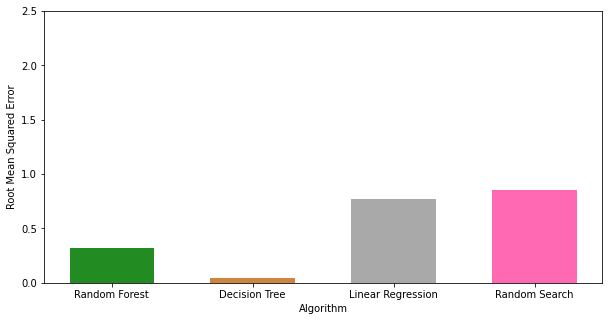

In [153]:
train_acc=np.array([forest_train_rmse,tree_train_rmse,lin_train_rmse,rnd_train_rmse])

test_acc=np.array([forest_rmse,tree_rmse,lin_rmse,rnd_rmse,final_rmse])
print(train_acc)
print(test_acc)
fig = plt.figure(figsize = (10, 5))
plt.ylim(0,2.5)
plt.ylabel("Root Mean Squared Error")
plt.xlabel("Algorithm")
plt.bar(height=train_acc,x=["Random Forest","Decision Tree","Linear Regression","Random Search"], color =["forestgreen","peru","darkgrey","hotpink"],
        width = 0.6)
plt.show()